# Computationally Visuallizing Crystals

In condensed matter, we find ourselves in the interesting middle ground of dealing with large numbers ($10^{23}$) of extremely small particles (atoms, electrons).  

Luckily, the particles don't each do their own thing, but often come in nice, structured, repeated units.  Lattices.  So as our first step into the field, we will look at some of our basic building blocks.  

The first building blocks we will look at today are <i>unit cells</i>. Unit cells can either be thought of as having one particle per block, or as representing the overall translational symmetries.  Some lattices, like honeycomb or diamond, have two sites that are inside one of these unit cells.  

I used an important word there, <i>translational symmetry</i>.  How can we move the lattice such that, if we had an infinite number of them, it looked the same? The unit vectors I use to generate sites also describe the translational symmetries of the lattice.

### Introductory Note on Packages
Many times I will use extra packages developed for Julia, such as plotting functionality.  If you are using the package for the first time on your machine, you will need to evaluate `Pkg.add("...")` and `Pkg.update()` before `using ...` 

If you are using JuliaBox, you will need to evaluate the those lines each time.  

The first time a packaged is used on a machine by `using ...`, the computer has to compile the package, and that can take a little bit of time.  As the language develops, the developers intend to create a more efficient system, but for now, we need patience.    

In [1]:
# importing our packages
Pkg.add("PyPlot");
Pkg.update();
using PyPlot;

INFO: Nothing to be done
INFO: Updating METADATA...
INFO: Computing changes...
INFO: No packages to install, update or remove


## Define The Relevant Variables

Choose the lattice you want to look at, and put that string into the lattice variable.  
Current options:
<ul>
    <li> Simple Cubic = "sc"
    <li> Plane triangular lattice = "pt"
    <li> Body-Centered Cubic = "bcc"
    <li> Face-Centered Cubic = "fcc"
Note: Square is Simple Cubic for Nz=1
</ul>

Also, input the size of lattice you want to look at.

In [21]:
lattice="sc";

Nx=3;
Ny=3;
Nz=3;

In [22]:
# A cell to just evaluate
# This one sets the unit vectors (a,b,c) for the different unit cells
# Can you guess what a lattice will look like by looking at the vectors?
if(lattice=="sc")
    d=3;
    a=[1,0,0];
    b=[0,1,0];
    c=[0,0,1];
elseif(lattice=="pt")
    d=2;
    a=[1,0,0];
    b=[.5,sqrt(3)/2,0];
    c=[0,0,1];
elseif(lattice=="bcc")
    d=3;
    a=[.5,.5,.5];
    b=[.5,.5,-.5];
    c=[.5,-.5,.5];
elseif(lattice=="fcc")
    d=3;
    a=[.5,.5,0];
    b=[.5,0,.5];
    c=[0,.5,.5];
else
    println("Please have a correct lattice")
end

3-element Array{Int64,1}:
 0
 0
 1

In [23]:
# Another cell to just evaluate
# Here we set up some numbers and matrices for our computation
N=Nx*Ny*Nz;    #The total number of sites
aM=transpose(a);
bM=transpose(repeat(b,outer=[1,Nx])); #these allow us to copy an entire row or layer at once
cM=transpose(repeat(c,outer=[1,Nx*Ny]));

X=Array{Float64}(N,3);  #where we store the positions

27x3 Array{Float64,2}:
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 ⋮            
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0

In [24]:
# Another cell to just evaluate
# Here we are actually calculating the positions for every site
for i in 1:Nx    #for the first row
    X[i,:]=(i-1)*a;
end

for j in 2:Ny    #copying the first row into the first layer
    X[(Nx*(j-1)+1):(Nx*(j-1)+Nx),:]=X[1:Nx,:]+(j-1)*bM;
end

for j in 2:Nz    #copying the first layer into the entire cube
    X[(Ny*Nx*(j-1)+1):(Ny*Nx*(j-1)+Nx*Ny),:]=X[1:Nx*Ny,:]+(j-1)*cM;
end

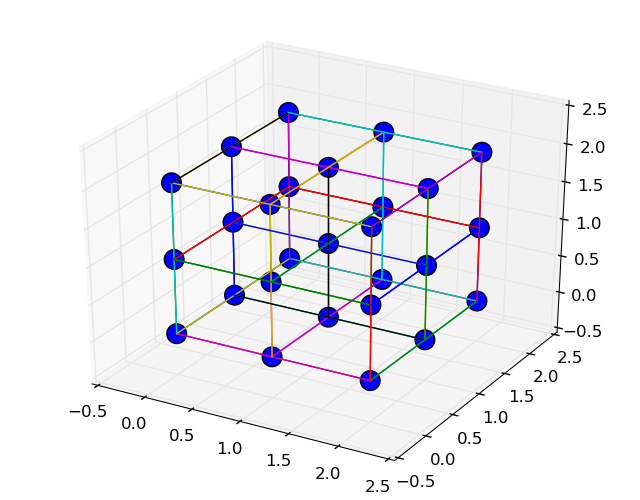

PyObject <mpl_toolkits.mplot3d.art3d.Path3DCollection object at 0x7f741ab7f290>

In [25]:
pygui(false);  #if true, launches new window with interactive capabilities

drawcube=true;  #gives lines for a cube, helps interpret the dots
ls=2;  # how many cubes to draw
if(drawcube==true)
    v=collect(0:ls);
    zed=zeros(v);
    for i in 0:ls
        for j in 0:ls  
            plot3D(zed+i,v,zed+j)
            plot3D(zed+i,zed+j,v)
    
            plot3D(v,zed+i,zed+j)
            plot3D(zed+j,zed+i,v)
    
            plot3D(v,zed+j,zed+i)
            plot3D(zed+j,v,zed+i)
        end
    end
end

scatter3D(X[:,1],X[:,2],X[:,3],s=200*ones(X[:,1]),alpha=1)

## Go Back and Fiddle!

As you might have noticed, this isn't just a blog where you just read through it.  Interact with it.  Change some lines, and see what happens.  I choose body centered cubic to display first, but what do the other lattices look like?  

Chose `pygui(true)` to pop open a window and manipulate the plot in 3D.  

Look at different lattice sizes.  

Can you hand draw them on paper?  
![Mydrawing](handdraw2.jpg)

Let me know what you think, and stay tuned for the next post: 
## <center><i> Multi-site unit cells</i></center>
